In [ ]:
#まずこのセルを実行して、複数のcsvファイルをアップロードする。
from google.colab import files
uploaded = files.upload()

Saving I_V Sweep 4Probe [(17) ; 4_2_2022 11_06_56 AM].csv to I_V Sweep 4Probe [(17) ; 4_2_2022 11_06_56 AM].csv
Saving I_V Sweep 4Probe [(18) ; 4_2_2022 11_08_16 AM].csv to I_V Sweep 4Probe [(18) ; 4_2_2022 11_08_16 AM].csv
Saving I_V Sweep 4Probe [(19) ; 4_2_2022 11_09_35 AM].csv to I_V Sweep 4Probe [(19) ; 4_2_2022 11_09_35 AM].csv
Saving I_V Sweep 4Probe [(20) ; 4_2_2022 11_13_15 AM].csv to I_V Sweep 4Probe [(20) ; 4_2_2022 11_13_15 AM].csv
Saving I_V Sweep 4Probe [(21) ; 4_2_2022 11_16_35 AM].csv to I_V Sweep 4Probe [(21) ; 4_2_2022 11_16_35 AM].csv
Saving I_V Sweep 4Probe [(22) ; 4_2_2022 11_21_24 AM].csv to I_V Sweep 4Probe [(22) ; 4_2_2022 11_21_24 AM].csv
Saving I_V Sweep 4Probe [(23) ; 4_2_2022 11_22_52 AM].csv to I_V Sweep 4Probe [(23) ; 4_2_2022 11_22_52 AM].csv
Saving I_V Sweep 4Probe [(24) ; 4_2_2022 11_24_11 AM].csv to I_V Sweep 4Probe [(24) ; 4_2_2022 11_24_11 AM].csv


[['/content/I_V Sweep 4Probe [(19) ; 4_2_2022 11_09_35 AM].csv']
 ['/content/I_V Sweep 4Probe [(18) ; 4_2_2022 11_08_16 AM].csv']
 ['/content/I_V Sweep 4Probe [(23) ; 4_2_2022 11_22_52 AM].csv']
 ['/content/I_V Sweep 4Probe [(21) ; 4_2_2022 11_16_35 AM].csv']
 ['/content/I_V Sweep 4Probe [(20) ; 4_2_2022 11_13_15 AM].csv']
 ['/content/I_V Sweep 4Probe [(22) ; 4_2_2022 11_21_24 AM].csv']
 ['/content/I_V Sweep 4Probe [(24) ; 4_2_2022 11_24_11 AM].csv']
 ['/content/I_V Sweep 4Probe [(17) ; 4_2_2022 11_06_56 AM].csv']]
-1205.75026
0.00001
-2689.25564
0.00000
-4137.27833
0.00000
-447550.60376
-0.00001
-11710.23556
-0.00001
-740.12509
-0.00001
-137133.20768
0.00000
-204.24253
-0.00001


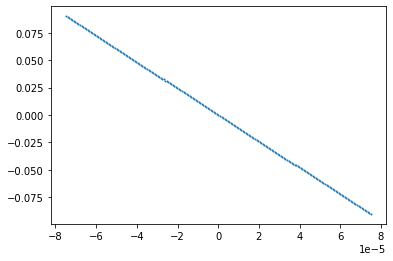

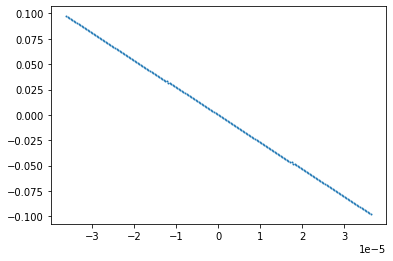

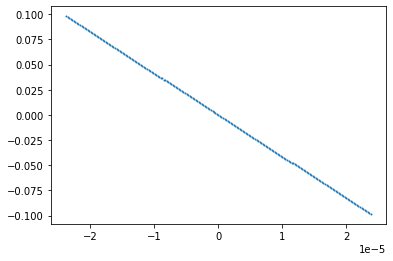

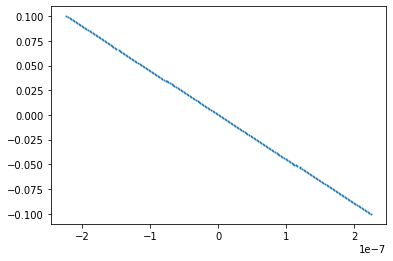

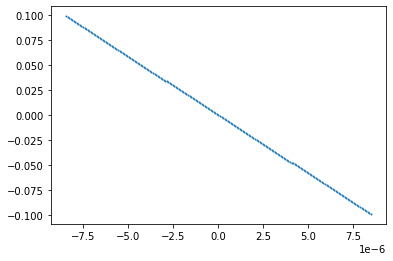

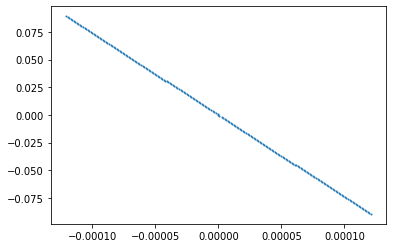

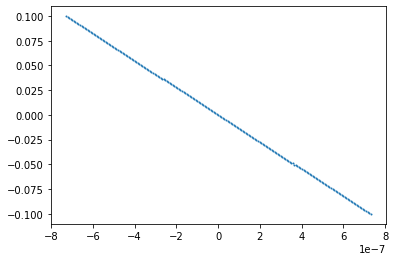

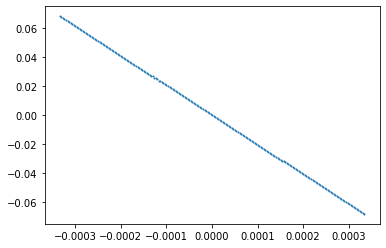

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from glob import glob

#パス（csvファイルがあるフォルダ）を取得して、filepathsという名前のリストにする。
#contentの中にある、.csvというファイル
filepaths = glob('/content/*.csv')
#順番が計算したファイルの順番がわかるように、filepathsという名前のリストの中身を表示
filename = np.array(filepaths)
sz = filename.size
fname = filename.reshape(sz,1)
print(fname)

#ffは適当に付けた変数名で、filepathsは各csvファイルのパスが入っている。ff=filepaths[0~n(ファイルの数)]
for ff in filepaths:
  #これがあると、グラフが１個ずつ出てくれる。
  plt.figure()

  #ただ単にcsvファイルを読み込めなかったので、先に列数を指定すると読み込めた。
  col_names = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']
  #ff=filepaths[0]からループが始まる。次はff=filepaths[1]の計算...
  x = pd.read_csv(ff,names=col_names)

  #欲しい列を抽出する。
  y3 = x.iloc[252:453, 2]
  y4 = x.iloc[252:453, 3]
  y5 = x.iloc[252:453, 4]

  #文字列から数値へ変換（string→float）
  y3_value = y3.astype({'a3':'float'})
  #print(y3_value.dtypes)
  #print(y3_value)
  y4_value = y4.astype({'a4':'float'})
  y5_value = y5.astype({'a5':'float'})

  #PandasからNumPyへ変換（NumPyで回帰を使いたいから）
  V_npy3 = y3_value.to_numpy()
  I_npy4 = y4_value.to_numpy()
  V_npy5 = y5_value.to_numpy()

  #Iの配列を、n行1列の形にreshape
  n = I_npy4.size
  I = I_npy4.reshape(n, 1)

  #V3-V5を配列同士の引き算で計算（引き算逆にすると、正負が反対になりそう）
  V = V_npy3-V_npy5

  plt.scatter(I, V, s=1)

  reg = LinearRegression()
  reg.fit(I, V)

  #回帰係数と、切片の値が出てくる。
  print('{0:.5f}'. format(reg.coef_[0]))
  print('{0:.5f}'. format(reg.intercept_))

以下、作業途中に書いたコード 



In [ ]:
import os
os.chdir('./')
print(os.getcwd())

/content


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving I_V Sweep 4Probe [C5-mini2-5(1) ; 4_4_2022 2_52_10 PM].csv to I_V Sweep 4Probe [C5-mini2-5(1) ; 4_4_2022 2_52_10 PM] (2).csv
Saving I_V Sweep 4Probe [C5-mini2-6(2) ; 4_4_2022 3_02_01 PM].csv to I_V Sweep 4Probe [C5-mini2-6(2) ; 4_4_2022 3_02_01 PM] (2).csv


608.48430
0.00005


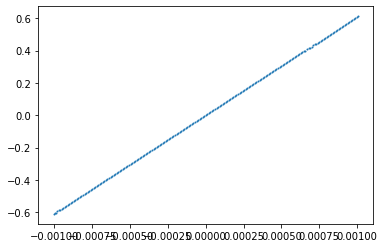

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
#from glob import glob

#ただ単にcsvファイルを読み込めなかったので、先に列数を指定すると読み込めた。
col_names = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']
x = pd.read_csv('/content/I_V Sweep 4Probe [C5-mini2-6(2) ; 4_4_2022 3_02_01 PM].csv',names=col_names)
#columns = x.iloc[251, :]
#print(columns)

#欲しい列を抽出する。
y3 = x.iloc[252:453, 2]
y4 = x.iloc[252:453, 3]
y5 = x.iloc[252:453, 4]
#print(y.dtypes)
#print(y3)
#print(y4)
#print(y5)

#文字列から数値へ変換（string→float）
y3_value = y3.astype({'a3':'float'})
#print(y3_value.dtypes)
#print(y3_value)
y4_value = y4.astype({'a4':'float'})
y5_value = y5.astype({'a5':'float'})

#PandasからNumPyへ変換（NumPyで回帰を使いたいから）
V_npy3 = y3_value.to_numpy()
I_npy4 = y4_value.to_numpy()
V_npy5 = y5_value.to_numpy()

#Iの配列を、n行1列の形にreshape
n = I_npy4.size
I = I_npy4.reshape(n, 1)

#V3-V5を配列同士の引き算で計算
V = V_npy3-V_npy5

plt.scatter(I, V, s=1)

reg = LinearRegression()
reg.fit(I, V)

print('{0:.5f}'. format(reg.coef_[0]))
print('{0:.5f}'. format(reg.intercept_))


In [ ]:
import pandas as pd
from pathlib import Path

p = Path('./content')

file_name = '**/*.csv'

csv_files = p.glob(file_name)

def main():
  for file in csv_files:
    col_names = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']
    df1 = pd.read_csv(file, names = col_names)
    print(file)
    print(df1)
  
if __name__ == '__main__':
  main()

In [ ]:
import pandas as pd
from glob import glob

filepaths = glob('/content/*.csv')

filepaths

['/content/I_V Sweep 4Probe [C5-mini2-5(1) ; 4_4_2022 2_52_10 PM] (2).csv',
 '/content/I_V Sweep 4Probe [C5-mini2-5(1) ; 4_4_2022 2_52_10 PM] (1).csv',
 '/content/I_V Sweep 4Probe [C5-mini2-5(1) ; 4_4_2022 2_52_10 PM].csv',
 '/content/I_V Sweep 4Probe [C5-mini2-6(2) ; 4_4_2022 3_02_01 PM].csv',
 '/content/I_V Sweep 4Probe [C5-mini2-6(2) ; 4_4_2022 3_02_01 PM] (1).csv',
 '/content/I_V Sweep 4Probe [C5-mini2-6(2) ; 4_4_2022 3_02_01 PM] (2).csv']

In [ ]:
for ff in filepaths:
  col_names = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']
  x = pd.read_csv(ff,names=col_names)

  y3 = x.iloc[252:453, 2]
  y4 = x.iloc[252:453, 3]
  y5 = x.iloc[252:453, 4]

  print(y3)
  print(y4)
  print(y5)

252                -0.99828
253                -0.98832
254                -0.97836
255                -0.96832
256                -0.95836
               ...         
448                 0.95868
449                 0.96868
450     0.97903999999999991
451                 0.98856
452     0.99859999999999993
Name: a3, Length: 201, dtype: object
252                 -3.8732E-05
253                 -3.7626E-05
254     -3.6184000000000005E-05
255                  -3.737E-05
256                 -3.6072E-05
                 ...           
448      2.9486000000000002E-05
449      3.2500000000000004E-05
450                  2.5992E-05
451                  3.2246E-05
452                  3.2468E-05
Name: a4, Length: 201, dtype: object
252     -0.97083999999999993
253                 -0.96136
254                 -0.95256
255                 -0.94268
256     -0.93263999999999991
               ...          
448      0.93807999999999991
449                  0.94656
450                  0.95716
451  

712.34815
0.00002
712.34815
0.00002
712.34815
0.00002
608.48430
0.00005
608.48430
0.00005
608.48430
0.00005


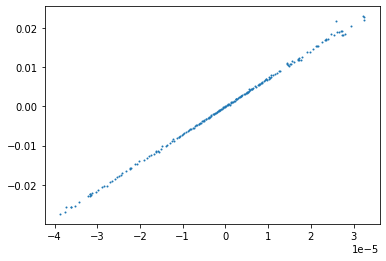

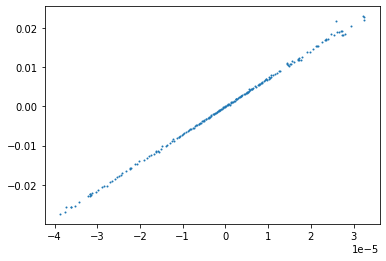

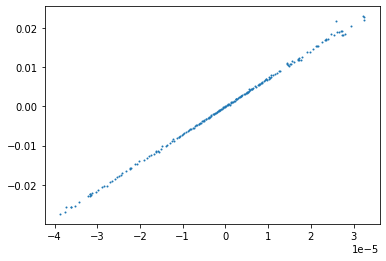

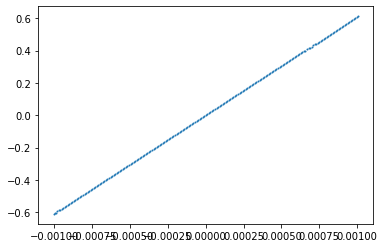

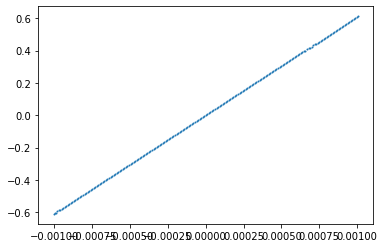

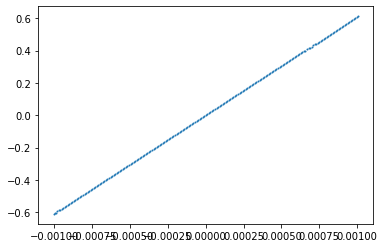

In [ ]:
for ff in filepaths:
  plt.figure()
  col_names = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']
  x = pd.read_csv(ff,names=col_names)

  y3 = x.iloc[252:453, 2]
  y4 = x.iloc[252:453, 3]
  y5 = x.iloc[252:453, 4]

  #文字列から数値へ変換（string→float）
  y3_value = y3.astype({'a3':'float'})
  #print(y3_value.dtypes)
  #print(y3_value)
  y4_value = y4.astype({'a4':'float'})
  y5_value = y5.astype({'a5':'float'})

  #PandasからNumPyへ変換（NumPyで回帰を使いたいから）
  V_npy3 = y3_value.to_numpy()
  I_npy4 = y4_value.to_numpy()
  V_npy5 = y5_value.to_numpy()

  #Iの配列を、n行1列の形にreshape
  n = I_npy4.size
  I = I_npy4.reshape(n, 1)

  #V3-V5を配列同士の引き算で計算
  V = V_npy3-V_npy5

  plt.scatter(I, V, s=1)

  reg = LinearRegression()
  reg.fit(I, V)

  print('{0:.5f}'. format(reg.coef_[0]))
  print('{0:.5f}'. format(reg.intercept_))

In [ ]:
3import pandas as pd
import numpy as np

col_names = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']
x = pd.read_csv('/content/I_V Sweep 4Probe [C5-mini2-5(1) ; 4_4_2022 2_52_10 PM] (1).csv',names=col_names)
print(x)

npx = x.to_numpy()
print(npx[251, 0:7])
y = npx[252:453, 0:6]
print(y)

ydata = np.asarray(y, dtype = float)
print(ydata)

                a1                    a2                    a3  \
0       SetupTitle      I/V Sweep 4Probe                   NaN   
1    PrimitiveTest             I/V Sweep                   NaN   
2    TestParameter     Context.MainFrame                B1500A   
3    TestParameter      Channel.UnitType                   SMU   
4    TestParameter          Channel.Unit               SMU5:HR   
..             ...                   ...                   ...   
448      DataValue   0.96000000000000008               0.95868   
449      DataValue   0.97000000000000008               0.96868   
450      DataValue   0.98000000000000009   0.97903999999999991   
451      DataValue    0.9900000000000001               0.98856   
452      DataValue                     1   0.99859999999999993   

                          a4                    a5                   a6   a7  
0                        NaN                   NaN                  NaN  NaN  
1                        NaN                   Na

ValueError: ignored